<a href="https://colab.research.google.com/github/NLPaladins/rinehartAnalysis_wordVectors/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - Project 2
## Rinehart Analysis with Word Vectors
**Team**: *Jean Merlet, Konstantinos Georgiou, Matt Lane*

## Where to put the code
- Place the preprocessing functions/classes in [nlp_libs/books/preprocessing.py](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/nlp_libs/books/preprocessing.py)
- The custom word embeddings functions/classes (task 1) in [nlp_libs/books/word_embeddings.py](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/nlp_libs/books/word_embeddings.py) (separate class)
- The pretrained word embeddings functions/classes (task 2) in [nlp_libs/books/word_embeddings.py](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/nlp_libs/books/word_embeddings.py) (separate class)
- The functions/classes (if any) that compare the results (tasks 3, 4, 5) in [nlp_libs/books/compare_statistics.py](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/nlp_libs/books/compare_statistics.py)
- Any plotting related functions in [nlp_libs/books/plotter.py](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/nlp_libs/books/plotter.py)

**The code is reloaded automatically. Any class object needs to reinitialized though.** 

## Config file
The yml/config file is located at: [confs/proj_2.yml](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/confs/proj_2.yml)<br>
To load it run:
```python
config_path='confs/proj_2.yml'
conf = Configuration(config_src=config_path)
# Get the books dictionary
books = conf.get_config('data_loader')['config']['books'] # type = Dict
print(books.keys())
print(books['The_Bat'])
```
To reload the config just run the 2nd and 3rd command.

## Libraries Overview:
All the libraries are located under *"\<project root>/nlp_libs"*
- nlp_libs/**books**: This project's code (imported later)
- nlp_libs/**configuration**: Class that creates config objects from yml files
- nlp_libs/**fancy_logger**: Logger that can be used instead of prints for text formatting (color, bold, underline etc)

## Project 1 Code
If you need to import anything from Project 1 just run:
```python
import proj1_nlp_libs.books.processed_book as proc
import proj1_nlp_libs.books.book_extractor as extr
import proj1_nlp_libs.books.plotter as pl
```

## For more info check out:
- the **[Project Board](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/projects/1)**
- the **[README](https://github.com/NLPaladins/https://github.com/NLPaladins/rinehartAnalysis_wordVectors/blob/main/README.md)**
- and the **[Current Issues](https://github.com/NLPaladins/rinehartAnalysis_wordVectors/issues)**

# ------------------------------------------------------------------

## On Google Collab?
- **If yes, run the two cells and press the two buttons below:**
- Otherwise go to "***Import the base Libraries***"

In [ ]:
# Import Jupyter Widgets
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display
# Clone the repository if you're in Google Collab
def clone_project(is_collab: bool = False):
    print("Cloning Project..")
    !git clone https://github.com/NLPaladins/rinehartAnalysis_wordVectors.git
    print("Project cloned.")
       
print("Clone project?")
print("(If you do this you will ovewrite local changes on other files e.g. configs)")
print("Not needed if you're not on Google Collab")
btn = widgets.Button(description="Yes, clone")
btn.on_click(clone_project)
display(btn)

Clone project?
(If you do this you will ovewrite local changes on other files e.g. configs)
Not needed if you're not on Google Collab


Button(description='Yes, clone', style=ButtonStyle())

In [ ]:
# Clone the repository if you're in Google Collab
def change_dir(is_collab: bool = False):
    try:
        print("Changing dir..")
        os.chdir('/content/rinehartAnalysis')
        print('done')
        print("Current dir:")
        print(os.getcwd())
        print("Dir Contents:")
        print(os.listdir())
        print("\nInstalling Requirements")
        !pip install -r requirements.txt
    except Exception:
        print("Error: Project not cloned")
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

### To commit and push Google Collab notebook to Github
Click **File > Save a copy on Gihtub**

# ------------------------------------------------------------------

# Initializations

## Import the base Libraries

In [ ]:
# Imports
%load_ext autoreload
%autoreload 2
from importlib import reload as reload_lib
from typing import *
import os
import re
from pprint import pprint
# Numpy
import numpy as np

# Import preprocessing lib
from nlp_libs.books import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the YML file

In [ ]:
from nlp_libs import Configuration

In [ ]:
# The path of configuration and log save path
config_path = "confs/proj_2.yml"
# !cat "$config_path"
# Load the configuratåion
conf = Configuration(config_src=config_path)
# Get the books dict
books_conf = conf.get_config('data_loader')['config']['books']
# print(books.keys())
# pprint(books)  # Pretty print the books dict

2021-11-01 02:27:46 Config       INFO     Configuration file loaded successfully from path: /Users/96v/Documents/DSE/nlp/ex/rinehartAnalysis_wordVectors/confs/proj_2.yml
2021-11-01 02:27:46 Config       INFO     Configuration Tag: proj2


## Setup Logger and Example

In [ ]:
log_path = "logs/proj_2.log"
# Load and setup logger
logger = ColorizedLogger(logger_name='Notebook', color='cyan')
ColorizedLogger.setup_logger(log_path=log_path, debug=False, clear_log=True)
# Examples
logger.info("Logger Examples:")
logger.nl(num_lines=1) # New lines
logger.warn("Logger Warning underlined", attrs=['underline']) 
# Atrs:  bold, dark, underline, blink, reverse, concealed
logger.error("Logger Error in red&yellow", color="yellow", on_color="on_red")
# Colors: on_grey, on_red, on_green, on_yellow, on_blue, on_magenta, on_cyan, on_white

2021-11-01 02:27:50 FancyLogger  INFO     Logger is set. Log file path: /Users/96v/Documents/DSE/nlp/ex/rinehartAnalysis_wordVectors/logs/proj_2.log
2021-11-01 02:27:50 Notebook     INFO     Logger Examples:

2021-11-01 02:27:50 Notebook     WARNING  Logger Warning underlined
2021-11-01 02:27:50 Notebook     ERROR    Logger Error in red&yellow


# ------------------------------------------------------------------

# Start of Project Code

In [ ]:
from nlp_libs import books as books_lib

## Word Embeddings

### The Circular Staircase

In [ ]:
# Load conf
book_meta = books_conf['The_Circular_Staircase']
book = ProcessedBook(book_meta)

In [ ]:
# Lemmatize sentences
protagonist_subs = list(book_meta['protagonists'][0].values())[0]
substitution = (protagonist_subs, 'protagonist')
sentences_substituted = book.lemmatize_by_sentence(word_subs=substitution)
sentences = book.lemmatize_by_sentence()

In [ ]:
# Generate word combinations
protagonists_antagonists = books_lib.word_embeddings\
                          .get_combinations(conf=book_meta, 
                                            keys_1=['protagonists'], 
                                            get_all_sub_values_1=True,
                                            keys_2=['antagonists'],
                                            get_all_sub_values_2=True,
                                            ignore_words_with_spaces=True)
antagonists_crime_weapon = books_lib.word_embeddings\
                          .get_combinations(conf=book_meta, 
                                            keys_1=['antagonists'],
                                            get_all_sub_values_1=True,
                                            keys_2=['crime', 'crime_weapon'],
                                            get_all_sub_values_2=False,
                                            ignore_words_with_spaces=True)
antagonists_crime_objects = books_lib.word_embeddings\
                           .get_combinations(conf=book_meta,
                                             keys_1=['antagonists'],
                                             get_all_sub_values_1=True,
                                             keys_2=['crime', 'crime_objects'],
                                             get_all_sub_values_2=False,
                                             ignore_words_with_spaces=True)

print("\nprotagonists_antagonists: ")
pprint(protagonists_antagonists)
print("\nantagonists_crime_weapon: ")
pprint(antagonists_crime_weapon)
print("\nantagonists_crime_objects: ")
pprint(antagonists_crime_objects)


protagonists_antagonists: 
[('jamieson', 'watson'), ('detective', 'watson'), ('winters', 'watson')]

antagonists_crime_weapon: 
[('watson', 'revolver')]

antagonists_crime_objects: 
[('watson', 'staircase'), ('watson', 'floor'), ('watson', 'waistcoat')]


In [ ]:
# Calculate distances with custom word embeddings
protag_antag_dists = books_lib\
                     .word_embeddings\
                     .calculate_differing_distances(sentences=sentences, 
                                                    word_pairs=protagonists_antagonists)
antag_crime_weap_dists = books_lib\
                         .word_embeddings\
                         .calculate_differing_distances(sentences=sentences, 
                                                        word_pairs=antagonists_crime_weapon)
antag_crime_obj_dists = books_lib\
                        .word_embeddings\
                        .calculate_differing_distances(sentences=sentences, 
                                                       word_pairs=antagonists_crime_objects)

waistcoat not in vocabulary! Skipping..


In [ ]:
# Save the results
protag_antag_dists.to_pickle(f"data{os.sep}The_Circular_Staircase__protag_antag_dists.pkl")
antag_crime_weap_dists.to_pickle(f"data{os.sep}The_Circular_Staircase__antag_crime_weap_dists.pkl")
antag_crime_obj_dists.to_pickle(f"data{os.sep}The_Circular_Staircase__antag_crime_obj_dists.pkl")
# To load them
protag_antag_dists = pd.read_pickle(f"data{os.sep}The_Circular_Staircase__protag_antag_dists.pkl")
antag_crime_weap_dists = pd.read_pickle(f"data{os.sep}The_Circular_Staircase__antag_crime_weap_dists.pkl")
antag_crime_obj_dists = pd.read_pickle(f"data{os.sep}The_Circular_Staircase__antag_crime_obj_dists.pkl")

In [ ]:
display(protag_antag_dists.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_weap_dists.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_obj_dists.sort_values(['cosineSim', 'dotSim']))

,word1,word2,vectorSize,windowSize,cosineSim,dotSim
11,winters,watson,50,10,0.815324,0.226136
23,winters,watson,100,10,0.854939,0.203261
8,winters,watson,50,3,0.890092,0.256595
5,winters,watson,50,5,0.939041,0.394743
2,winters,watson,50,2,0.941719,0.318128
20,winters,watson,100,3,0.942418,0.266561
17,winters,watson,100,5,0.944294,0.290055
35,winters,watson,200,10,0.957172,0.235312
14,winters,watson,100,2,0.968847,0.314428
29,winters,watson,200,5,0.970930,0.250348


,word1,word2,vectorSize,windowSize,cosineSim,dotSim
0,watson,revolver,50,2,0.996388,2.048274
2,watson,revolver,50,3,0.996402,2.103228
1,watson,revolver,50,5,0.996728,2.335351
3,watson,revolver,50,10,0.997333,2.892402
6,watson,revolver,100,3,0.998239,1.964364
4,watson,revolver,100,2,0.998311,2.085729
5,watson,revolver,100,5,0.998352,2.272892
7,watson,revolver,100,10,0.998477,2.780230
8,watson,revolver,200,2,0.998885,1.742970
9,watson,revolver,200,5,0.999129,2.206344


,word1,word2,vectorSize,windowSize,cosineSim,dotSim
0,watson,staircase,50,2,0.994709,3.196085
2,watson,staircase,50,5,0.995297,4.412333
4,watson,staircase,50,3,0.995440,3.766405
6,watson,staircase,50,10,0.995862,5.197194
8,watson,staircase,100,2,0.996393,3.219331
12,watson,staircase,100,3,0.996818,3.698259
10,watson,staircase,100,5,0.997257,4.482093
14,watson,staircase,100,10,0.997580,5.293987
9,watson,floor,100,2,0.998022,2.347331
7,watson,floor,50,10,0.998115,4.143808


In [ ]:
# Calculate distances for pretrained embeddings
model_names = books_lib.word_embeddings.get_model_names()
model_names = [mn for mn in model_names if 'glove-wiki-gigaword' in mn]
print(model_names)

protag_antag_dists_pre = books_lib\
                     .word_embeddings\
                     .calculate_differing_distances(model_names=model_names, 
                                                    word_pairs=protagonists_antagonists)
antag_crime_weap_dists_pre = books_lib\
                         .word_embeddings\
                         .calculate_differing_distances(model_names=model_names, 
                                                        word_pairs=antagonists_crime_weapon)
antag_crime_obj_dists_pre = books_lib\
                        .word_embeddings\
                        .calculate_differing_distances(model_names=model_names, 
                                                       word_pairs=antagonists_crime_objects)

['glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300']


In [ ]:
# Save the results
protag_antag_dists_pre.to_pickle(f"data{os.sep}The_Circular_Staircase__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre.to_pickle(f"data{os.sep}The_Circular_Staircase__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre.to_pickle(f"data{os.sep}The_Circular_Staircase__antag_crime_obj_dists__PRETRAINED.pkl")
# To load them
protag_antag_dists_pre = pd.read_pickle(f"data{os.sep}The_Circular_Staircase__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre = pd.read_pickle(f"data{os.sep}The_Circular_Staircase__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre = pd.read_pickle(f"data{os.sep}The_Circular_Staircase__antag_crime_obj_dists__PRETRAINED.pkl")


In [ ]:
display(protag_antag_dists_pre.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_weap_dists_pre.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_obj_dists_pre.sort_values(['cosineSim', 'dotSim']))

,word1,word2,model_name,cosineSim,dotSim
11,winters,watson,glove-wiki-gigaword-300,0.131054,4.648602
9,jamieson,watson,glove-wiki-gigaword-300,0.177056,5.408132
8,winters,watson,glove-wiki-gigaword-200,0.190237,5.878514
10,detective,watson,glove-wiki-gigaword-300,0.231268,8.479040
6,jamieson,watson,glove-wiki-gigaword-200,0.246759,6.121186
5,winters,watson,glove-wiki-gigaword-100,0.247268,5.877065
7,detective,watson,glove-wiki-gigaword-200,0.299077,9.377768
4,detective,watson,glove-wiki-gigaword-100,0.312865,7.730360
2,winters,watson,glove-wiki-gigaword-50,0.319342,6.600382
3,jamieson,watson,glove-wiki-gigaword-100,0.378605,6.556598


,word1,word2,model_name,cosineSim,dotSim
3,watson,revolver,glove-wiki-gigaword-300,0.076764,2.823694
2,watson,revolver,glove-wiki-gigaword-200,0.080159,2.572687
1,watson,revolver,glove-wiki-gigaword-100,0.092983,2.159217
0,watson,revolver,glove-wiki-gigaword-50,0.189547,3.656829


,word1,word2,model_name,cosineSim,dotSim
2,watson,waistcoat,glove-wiki-gigaword-50,-0.115300,-1.991010
9,watson,staircase,glove-wiki-gigaword-300,-0.061957,-2.265938
8,watson,waistcoat,glove-wiki-gigaword-200,-0.052516,-1.463759
5,watson,waistcoat,glove-wiki-gigaword-100,-0.026697,-0.507739
11,watson,waistcoat,glove-wiki-gigaword-300,-0.025495,-0.862577
6,watson,staircase,glove-wiki-gigaword-200,-0.007154,-0.225405
3,watson,staircase,glove-wiki-gigaword-100,0.004739,0.112529
0,watson,staircase,glove-wiki-gigaword-50,0.040019,0.829024
10,watson,floor,glove-wiki-gigaword-300,0.074942,2.673578
7,watson,floor,glove-wiki-gigaword-200,0.109642,3.529779


### The Man in the Lower Ten

In [ ]:
# Load conf
book_meta = books_conf['The_Man_in_Lower_Ten']
book = ProcessedBook(book_meta)

In [ ]:
# Lemmatize sentences
protagonist_subs = list(book_meta['protagonists'][0].values())[0]
substitution = (protagonist_subs, 'protagonist')
sentences_substituted = book.lemmatize_by_sentence(word_subs=substitution)
sentences = book.lemmatize_by_sentence()

In [ ]:
# Generate word combinations
protagonists_antagonists = books_lib.word_embeddings\
                          .get_combinations(conf=book_meta, 
                                            keys_1=['protagonists'], 
                                            get_all_sub_values_1=True,
                                            keys_2=['antagonists'],
                                            get_all_sub_values_2=True,
                                            ignore_words_with_spaces=True)
antagonists_crime_weapon = books_lib.word_embeddings\
                          .get_combinations(conf=book_meta, 
                                            keys_1=['antagonists'],
                                            get_all_sub_values_1=True,
                                            keys_2=['crime', 'crime_weapon'],
                                            get_all_sub_values_2=False,
                                            ignore_words_with_spaces=True)
antagonists_crime_objects = books_lib.word_embeddings\
                           .get_combinations(conf=book_meta,
                                             keys_1=['antagonists'],
                                             get_all_sub_values_1=True,
                                             keys_2=['crime', 'crime_objects'],
                                             get_all_sub_values_2=False,
                                             ignore_words_with_spaces=True)

print("\nprotagonists_antagonists: ")
pprint(protagonists_antagonists)
print("\nantagonists_crime_weapon: ")
pprint(antagonists_crime_weapon)
print("\nantagonists_crime_objects: ")
pprint(antagonists_crime_objects)


protagonists_antagonists: 
[('mcknight', 'curtis'),
 ('mcknight', 'alice'),
 ('richey', 'curtis'),
 ('richey', 'alice')]

antagonists_crime_weapon: 
[('curtis', 'dagger'), ('alice', 'dagger')]

antagonists_crime_objects: 
[('curtis', 'watch'),
 ('curtis', 'diamond'),
 ('curtis', 'revolver'),
 ('curtis', 'suit-case'),
 ('alice', 'watch'),
 ('alice', 'diamond'),
 ('alice', 'revolver'),
 ('alice', 'suit-case')]


In [ ]:
# Calculate distances with custom word embeddings
protag_antag_dists = books_lib\
                     .word_embeddings\
                     .calculate_differing_distances(sentences=sentences, 
                                                    word_pairs=protagonists_antagonists)
antag_crime_weap_dists = books_lib\
                         .word_embeddings\
                         .calculate_differing_distances(sentences=sentences, 
                                                        word_pairs=antagonists_crime_weapon)
antag_crime_obj_dists = books_lib\
                        .word_embeddings\
                        .calculate_differing_distances(sentences=sentences, 
                                                       word_pairs=antagonists_crime_objects)

diamond not in vocabulary! Skipping..
suit-case not in vocabulary! Skipping..


In [ ]:
# Save the results
protag_antag_dists.to_pickle(f"data{os.sep}The_Man_in_Lower_Ten__protag_antag_dists.pkl")
antag_crime_weap_dists.to_pickle(f"data{os.sep}The_Man_in_Lower_Ten__antag_crime_weap_dists.pkl")
antag_crime_obj_dists.to_pickle(f"data{os.sep}The_Man_in_Lower_Ten__antag_crime_obj_dists.pkl")
# To load them
protag_antag_dists = pd.read_pickle(f"data{os.sep}The_Man_in_Lower_Ten__protag_antag_dists.pkl")
antag_crime_weap_dists = pd.read_pickle(f"data{os.sep}The_Man_in_Lower_Ten__antag_crime_weap_dists.pkl")
antag_crime_obj_dists = pd.read_pickle(f"data{os.sep}The_Man_in_Lower_Ten__antag_crime_obj_dists.pkl")

In [ ]:
display(protag_antag_dists.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_weap_dists.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_obj_dists.sort_values(['cosineSim', 'dotSim']))

,word1,word2,vectorSize,windowSize,cosineSim,dotSim
5,mcknight,alice,50,5,0.903031,0.686012
7,richey,alice,50,5,0.903328,0.351407
19,richey,alice,100,2,0.932639,0.277642
17,mcknight,alice,100,2,0.933117,0.483038
1,mcknight,alice,50,2,0.944553,0.711724
...,...,...,...,...,...,...
44,mcknight,curtis,200,10,0.999338,5.781129
62,richey,curtis,300,10,0.999355,2.503855
52,mcknight,curtis,300,5,0.999449,4.747465
56,mcknight,curtis,300,3,0.999496,4.228148


,word1,word2,vectorSize,windowSize,cosineSim,dotSim
1,alice,dagger,50,2,0.867580,0.053471
7,alice,dagger,50,10,0.906888,0.065638
5,alice,dagger,50,3,0.930368,0.105227
3,alice,dagger,50,5,0.938526,0.127738
11,alice,dagger,100,5,0.941061,0.083384
13,alice,dagger,100,3,0.947945,0.088554
9,alice,dagger,100,2,0.948981,0.083659
15,alice,dagger,100,10,0.954537,0.077177
6,curtis,dagger,50,10,0.959467,0.339639
25,alice,dagger,300,2,0.963947,0.057135


,word1,word2,vectorSize,windowSize,cosineSim,dotSim
7,alice,revolver,50,5,0.901984,0.160218
6,alice,watch,50,5,0.903140,0.268157
19,alice,revolver,100,2,0.931706,0.133067
3,alice,revolver,50,2,0.932620,0.207517
18,alice,watch,100,2,0.933016,0.257610
...,...,...,...,...,...,...
40,curtis,watch,200,3,0.999045,2.146515
52,curtis,watch,300,5,0.999059,1.761408
60,curtis,watch,300,10,0.999155,1.885482
48,curtis,watch,300,2,0.999199,1.792144


In [ ]:
# Calculate distances for pretrained embeddings
model_names = books_lib.word_embeddings.get_model_names()
model_names = [mn for mn in model_names if 'glove-wiki-gigaword' in mn]
print(model_names)

protag_antag_dists_pre = books_lib\
                     .word_embeddings\
                     .calculate_differing_distances(model_names=model_names, 
                                                    word_pairs=protagonists_antagonists)
antag_crime_weap_dists_pre = books_lib\
                         .word_embeddings\
                         .calculate_differing_distances(model_names=model_names, 
                                                        word_pairs=antagonists_crime_weapon)
antag_crime_obj_dists_pre = books_lib\
                        .word_embeddings\
                        .calculate_differing_distances(model_names=model_names, 
                                                       word_pairs=antagonists_crime_objects)

['glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300']
suit-case not in vocabulary! Skipping..


In [ ]:
# Save the results
protag_antag_dists_pre.to_pickle(f"data{os.sep}The_Man_in_Lower_Ten__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre.to_pickle(f"data{os.sep}The_Man_in_Lower_Ten__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre.to_pickle(f"data{os.sep}The_Man_in_Lower_Ten__antag_crime_obj_dists__PRETRAINED.pkl")
# To load them
protag_antag_dists_pre = pd.read_pickle(f"data{os.sep}The_Man_in_Lower_Ten__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre = pd.read_pickle(f"data{os.sep}The_Man_in_Lower_Ten__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre = pd.read_pickle(f"data{os.sep}The_Man_in_Lower_Ten__antag_crime_obj_dists__PRETRAINED.pkl")

In [ ]:
display(protag_antag_dists_pre.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_weap_dists_pre.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_obj_dists_pre.sort_values(['cosineSim', 'dotSim']))

,word1,word2,model_name,cosineSim,dotSim
15,richey,alice,glove-wiki-gigaword-300,-0.003878,-0.161861
11,richey,alice,glove-wiki-gigaword-200,0.037048,1.216717
13,mcknight,alice,glove-wiki-gigaword-300,0.065908,2.016544
3,richey,alice,glove-wiki-gigaword-50,0.096338,1.623157
9,mcknight,alice,glove-wiki-gigaword-200,0.103667,2.675766
7,richey,alice,glove-wiki-gigaword-100,0.117431,2.631459
6,richey,curtis,glove-wiki-gigaword-100,0.186780,4.067541
5,mcknight,alice,glove-wiki-gigaword-100,0.220856,3.476785
14,richey,curtis,glove-wiki-gigaword-300,0.234730,8.951651
10,richey,curtis,glove-wiki-gigaword-200,0.239164,7.289041


,word1,word2,model_name,cosineSim,dotSim
7,alice,dagger,glove-wiki-gigaword-300,-0.063939,-2.519591
1,alice,dagger,glove-wiki-gigaword-50,-0.054243,-0.909711
3,alice,dagger,glove-wiki-gigaword-100,-0.004197,-0.090715
6,curtis,dagger,glove-wiki-gigaword-300,-0.002432,-0.087583
5,alice,dagger,glove-wiki-gigaword-200,0.000774,0.024867
4,curtis,dagger,glove-wiki-gigaword-200,0.023310,0.695448
2,curtis,dagger,glove-wiki-gigaword-100,0.046768,0.982470
0,curtis,dagger,glove-wiki-gigaword-50,0.079586,1.282962


,word1,word2,model_name,cosineSim,dotSim
17,alice,revolver,glove-wiki-gigaword-200,-0.031395,-1.124379
5,alice,revolver,glove-wiki-gigaword-50,-0.024099,-0.480969
23,alice,revolver,glove-wiki-gigaword-300,0.000693,0.028675
19,curtis,diamond,glove-wiki-gigaword-300,0.039226,1.437280
11,alice,revolver,glove-wiki-gigaword-100,0.068858,1.678941
20,curtis,revolver,glove-wiki-gigaword-300,0.081942,3.097135
8,curtis,revolver,glove-wiki-gigaword-100,0.093483,2.215160
13,curtis,diamond,glove-wiki-gigaword-200,0.097543,3.094470
21,alice,watch,glove-wiki-gigaword-300,0.112724,3.861098
12,curtis,watch,glove-wiki-gigaword-200,0.140903,3.895205


### The After House

In [ ]:
# Load conf
book_meta = books_conf['The_After_House']
book = ProcessedBook(book_meta)

In [ ]:
# Lemmatize sentences
protagonist_subs = list(book_meta['protagonists'][0].values())[0]
substitution = (protagonist_subs, 'protagonist')
sentences_substituted = book.lemmatize_by_sentence(word_subs=substitution)
sentences = book.lemmatize_by_sentence()

In [ ]:
# Generate word combinations
protagonists_antagonists = books_lib.word_embeddings\
                          .get_combinations(conf=book_meta, 
                                            keys_1=['protagonists'], 
                                            get_all_sub_values_1=True,
                                            keys_2=['antagonists'],
                                            get_all_sub_values_2=True,
                                            ignore_words_with_spaces=True)
antagonists_crime_weapon = books_lib.word_embeddings\
                          .get_combinations(conf=book_meta, 
                                            keys_1=['antagonists'],
                                            get_all_sub_values_1=True,
                                            keys_2=['crime', 'crime_weapon'],
                                            get_all_sub_values_2=False,
                                            ignore_words_with_spaces=True)
antagonists_crime_objects = books_lib.word_embeddings\
                           .get_combinations(conf=book_meta,
                                             keys_1=['antagonists'],
                                             get_all_sub_values_1=True,
                                             keys_2=['crime', 'crime_objects'],
                                             get_all_sub_values_2=False,
                                             ignore_words_with_spaces=True)

print("\nprotagonists_antagonists: ")
pprint(protagonists_antagonists)
print("\nantagonists_crime_weapon: ")
pprint(antagonists_crime_weapon)
print("\nantagonists_crime_objects: ")
pprint(antagonists_crime_objects)


protagonists_antagonists: 
[('mcwhirter', 'charlie'), ('mcwhirter', 'jones')]

antagonists_crime_weapon: 
[('charlie', 'axe'), ('jones', 'axe')]

antagonists_crime_objects: 
[('charlie', 'cabin'), ('jones', 'cabin')]


In [ ]:
# Calculate distances with custom word embeddings
protag_antag_dists = books_lib\
                     .word_embeddings\
                     .calculate_differing_distances(sentences=sentences, 
                                                    word_pairs=protagonists_antagonists)
antag_crime_weap_dists = books_lib\
                         .word_embeddings\
                         .calculate_differing_distances(sentences=sentences, 
                                                        word_pairs=antagonists_crime_weapon)
antag_crime_obj_dists = books_lib\
                        .word_embeddings\
                        .calculate_differing_distances(sentences=sentences, 
                                                       word_pairs=antagonists_crime_objects)

In [ ]:
# Save the results
protag_antag_dists.to_pickle(f"data{os.sep}The_After_House__protag_antag_dists.pkl")
antag_crime_weap_dists.to_pickle(f"data{os.sep}The_After_House__antag_crime_weap_dists.pkl")
antag_crime_obj_dists.to_pickle(f"data{os.sep}The_After_House__antag_crime_obj_dists.pkl")
# To load them
protag_antag_dists = pd.read_pickle(f"data{os.sep}The_After_House__protag_antag_dists.pkl")
antag_crime_weap_dists = pd.read_pickle(f"data{os.sep}The_After_House__antag_crime_weap_dists.pkl")
antag_crime_obj_dists = pd.read_pickle(f"data{os.sep}The_After_House__antag_crime_obj_dists.pkl")

In [ ]:
display(protag_antag_dists.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_weap_dists.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_obj_dists.sort_values(['cosineSim', 'dotSim']))

,word1,word2,vectorSize,windowSize,cosineSim,dotSim
0,mcwhirter,charlie,50,2,0.995551,3.463562
4,mcwhirter,charlie,50,3,0.995862,3.861660
2,mcwhirter,charlie,50,5,0.997285,4.925544
1,mcwhirter,jones,50,2,0.997297,4.772459
6,mcwhirter,charlie,50,10,0.998040,6.200480
5,mcwhirter,jones,50,3,0.998239,6.676806
8,mcwhirter,charlie,100,2,0.998353,3.269632
3,mcwhirter,jones,50,5,0.998582,8.161830
12,mcwhirter,charlie,100,3,0.998657,4.042089
9,mcwhirter,jones,100,2,0.998787,4.708530


,word1,word2,vectorSize,windowSize,cosineSim,dotSim
0,charlie,axe,50,2,0.994778,3.158438
4,charlie,axe,50,3,0.995892,3.979803
2,charlie,axe,50,5,0.996793,4.976197
1,jones,axe,50,2,0.997047,4.729199
8,charlie,axe,100,2,0.997720,3.328129
6,charlie,axe,50,10,0.997894,6.090695
5,jones,axe,50,3,0.998207,6.761901
12,charlie,axe,100,3,0.998256,4.259222
3,jones,axe,50,5,0.998286,8.276541
9,jones,axe,100,2,0.998513,5.090985


,word1,word2,vectorSize,windowSize,cosineSim,dotSim
0,charlie,cabin,50,2,0.994769,4.056558
4,charlie,cabin,50,3,0.996147,5.519394
2,charlie,cabin,50,5,0.997293,7.436164
1,jones,cabin,50,2,0.997770,6.557774
5,jones,cabin,50,3,0.998040,8.399900
8,charlie,cabin,100,2,0.998224,4.312644
6,charlie,cabin,50,10,0.998383,10.776827
12,charlie,cabin,100,3,0.998511,5.289762
9,jones,cabin,100,2,0.998570,6.451032
3,jones,cabin,50,5,0.998849,12.530585


In [ ]:
# Calculate distances for pretrained embeddings
model_names = books_lib.word_embeddings.get_model_names()
model_names = [mn for mn in model_names if 'glove-wiki-gigaword' in mn]
print(model_names)

protag_antag_dists_pre = books_lib\
                     .word_embeddings\
                     .calculate_differing_distances(model_names=model_names, 
                                                    word_pairs=protagonists_antagonists)
antag_crime_weap_dists_pre = books_lib\
                         .word_embeddings\
                         .calculate_differing_distances(model_names=model_names, 
                                                        word_pairs=antagonists_crime_weapon)
antag_crime_obj_dists_pre = books_lib\
                        .word_embeddings\
                        .calculate_differing_distances(model_names=model_names, 
                                                       word_pairs=antagonists_crime_objects)

['glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300']


In [ ]:
# Save the results
protag_antag_dists_pre.to_pickle(f"data{os.sep}The_After_House__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre.to_pickle(f"data{os.sep}The_After_House__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre.to_pickle(f"data{os.sep}The_After_House__antag_crime_obj_dists__PRETRAINED.pkl")
# To load them
protag_antag_dists_pre = pd.read_pickle(f"data{os.sep}The_After_House__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre = pd.read_pickle(f"data{os.sep}The_After_House__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre = pd.read_pickle(f"data{os.sep}The_After_House__antag_crime_obj_dists__PRETRAINED.pkl")

In [ ]:
display(protag_antag_dists_pre.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_weap_dists_pre.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_obj_dists_pre.sort_values(['cosineSim', 'dotSim']))

,word1,word2,model_name,cosineSim,dotSim
3,mcwhirter,jones,glove-wiki-gigaword-100,-0.078852,-1.989788
2,mcwhirter,charlie,glove-wiki-gigaword-100,-0.027188,-0.592603
0,mcwhirter,charlie,glove-wiki-gigaword-50,-0.001796,-0.033404
5,mcwhirter,jones,glove-wiki-gigaword-200,0.009445,0.375266
6,mcwhirter,charlie,glove-wiki-gigaword-300,0.020236,0.944832
1,mcwhirter,jones,glove-wiki-gigaword-50,0.026909,0.561387
7,mcwhirter,jones,glove-wiki-gigaword-300,0.027218,1.309602
4,mcwhirter,charlie,glove-wiki-gigaword-200,0.028993,1.106474


,word1,word2,model_name,cosineSim,dotSim
7,jones,axe,glove-wiki-gigaword-300,0.058356,2.237970
1,jones,axe,glove-wiki-gigaword-50,0.091232,1.751140
6,charlie,axe,glove-wiki-gigaword-300,0.110767,4.122083
2,charlie,axe,glove-wiki-gigaword-100,0.120016,2.692579
4,charlie,axe,glove-wiki-gigaword-200,0.121701,4.145815
5,jones,axe,glove-wiki-gigaword-200,0.129332,4.586984
3,jones,axe,glove-wiki-gigaword-100,0.147868,3.840658
0,charlie,axe,glove-wiki-gigaword-50,0.190560,3.260837


,word1,word2,model_name,cosineSim,dotSim
6,charlie,cabin,glove-wiki-gigaword-300,0.019189,0.776641
4,charlie,cabin,glove-wiki-gigaword-200,0.049996,1.810939
7,jones,cabin,glove-wiki-gigaword-300,0.095240,3.972335
5,jones,cabin,glove-wiki-gigaword-200,0.118129,4.454843
1,jones,cabin,glove-wiki-gigaword-50,0.151435,3.446088
0,charlie,cabin,glove-wiki-gigaword-50,0.190360,3.861888
2,charlie,cabin,glove-wiki-gigaword-100,0.191625,4.886503
3,jones,cabin,glove-wiki-gigaword-100,0.196183,5.791716


### The Window at the Withe Cat

In [ ]:
# Load conf
book_meta = books_conf['The_Window_at_the_White_Cat']
book = ProcessedBook(book_meta)

In [ ]:
# Lemmatize sentences
protagonist_subs = list(book_meta['protagonists'][0].values())[0]
substitution = (protagonist_subs, 'protagonist')
sentences_substituted = book.lemmatize_by_sentence(word_subs=substitution)
sentences = book.lemmatize_by_sentence()

In [ ]:
# Generate word combinations
protagonists_antagonists = books_lib.word_embeddings\
                          .get_combinations(conf=book_meta, 
                                            keys_1=['protagonists'], 
                                            get_all_sub_values_1=True,
                                            keys_2=['antagonists'],
                                            get_all_sub_values_2=True,
                                            ignore_words_with_spaces=True)
antagonists_crime_weapon = books_lib.word_embeddings\
                          .get_combinations(conf=book_meta, 
                                            keys_1=['antagonists'],
                                            get_all_sub_values_1=True,
                                            keys_2=['crime', 'crime_weapon'],
                                            get_all_sub_values_2=False,
                                            ignore_words_with_spaces=True)
antagonists_crime_objects = books_lib.word_embeddings\
                           .get_combinations(conf=book_meta,
                                             keys_1=['antagonists'],
                                             get_all_sub_values_1=True,
                                             keys_2=['crime', 'crime_objects'],
                                             get_all_sub_values_2=False,
                                             ignore_words_with_spaces=True)

print("\nprotagonists_antagonists: ")
pprint(protagonists_antagonists)
print("\nantagonists_crime_weapon: ")
pprint(antagonists_crime_weapon)
print("\nantagonists_crime_objects: ")
pprint(antagonists_crime_objects)


protagonists_antagonists: 
[('hunter', 'butler')]

antagonists_crime_weapon: 
[('butler', 'revolver')]

antagonists_crime_objects: 
[('butler', 'table'),
 ('butler', 'papers'),
 ('butler', 'ink'),
 ('butler', 'pen'),
 ('butler', 'tray')]


In [ ]:
# Calculate distances with custom word embeddings
protag_antag_dists = books_lib\
                     .word_embeddings\
                     .calculate_differing_distances(sentences=sentences, 
                                                    word_pairs=protagonists_antagonists)
antag_crime_weap_dists = books_lib\
                         .word_embeddings\
                         .calculate_differing_distances(sentences=sentences, 
                                                        word_pairs=antagonists_crime_weapon)
antag_crime_obj_dists = books_lib\
                        .word_embeddings\
                        .calculate_differing_distances(sentences=sentences, 
                                                       word_pairs=antagonists_crime_objects)

papers not in vocabulary! Skipping..


In [ ]:
# Save the results
protag_antag_dists.to_pickle(f"data{os.sep}The_Window_at_the_White_Cat__protag_antag_dists.pkl")
antag_crime_weap_dists.to_pickle(f"data{os.sep}The_Window_at_the_White_Cat__antag_crime_weap_dists.pkl")
antag_crime_obj_dists.to_pickle(f"data{os.sep}The_Window_at_the_White_Cat__antag_crime_obj_dists.pkl")
# To load them
protag_antag_dists = pd.read_pickle(f"data{os.sep}The_Window_at_the_White_Cat__protag_antag_dists.pkl")
antag_crime_weap_dists = pd.read_pickle(f"data{os.sep}The_Window_at_the_White_Cat__antag_crime_weap_dists.pkl")
antag_crime_obj_dists = pd.read_pickle(f"data{os.sep}The_Window_at_the_White_Cat__antag_crime_obj_dists.pkl")

In [ ]:
display(protag_antag_dists.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_weap_dists.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_obj_dists.sort_values(['cosineSim', 'dotSim']))

,word1,word2,vectorSize,windowSize,cosineSim,dotSim
0,hunter,butler,50,2,0.998649,6.992607
2,hunter,butler,50,3,0.999054,8.617027
1,hunter,butler,50,5,0.999175,10.407586
3,hunter,butler,50,10,0.999239,12.176865
4,hunter,butler,100,2,0.999327,6.326203
6,hunter,butler,100,3,0.999508,8.324596
5,hunter,butler,100,5,0.999610,10.319876
8,hunter,butler,200,2,0.999638,6.348320
7,hunter,butler,100,10,0.999655,12.323845
10,hunter,butler,200,3,0.999725,8.462931


,word1,word2,vectorSize,windowSize,cosineSim,dotSim
0,butler,revolver,50,2,0.997111,3.520599
1,butler,revolver,50,5,0.997776,4.953641
2,butler,revolver,50,3,0.998016,4.376356
3,butler,revolver,50,10,0.998364,5.429636
4,butler,revolver,100,2,0.999022,3.743461
6,butler,revolver,100,3,0.999052,4.410297
5,butler,revolver,100,5,0.999116,4.559133
7,butler,revolver,100,10,0.999295,5.619370
8,butler,revolver,200,2,0.999339,3.510765
10,butler,revolver,200,3,0.999486,4.325336


,word1,word2,vectorSize,windowSize,cosineSim,dotSim
63,butler,tray,300,10,-0.556462,-0.072594
47,butler,tray,200,10,-0.312000,-0.042168
31,butler,tray,100,10,-0.162811,-0.028412
15,butler,tray,50,10,0.061827,0.015677
55,butler,tray,300,5,0.519015,0.065524
...,...,...,...,...,...,...
44,butler,table,200,10,0.999404,7.938183
60,butler,table,300,10,0.999534,7.882177
36,butler,table,200,5,0.999535,6.991523
56,butler,table,300,3,0.999632,5.770615


In [ ]:
# Calculate distances for pretrained embeddings
model_names = books_lib.word_embeddings.get_model_names()
model_names = [mn for mn in model_names if 'glove-wiki-gigaword' in mn]
print(model_names)

protag_antag_dists_pre = books_lib\
                        .word_embeddings\
                        .calculate_differing_distances(model_names=model_names, 
                                                       word_pairs=protagonists_antagonists)
antag_crime_weap_dists_pre = books_lib\
                            .word_embeddings\
                            .calculate_differing_distances(model_names=model_names, 
                                                           word_pairs=antagonists_crime_weapon)
antag_crime_obj_dists_pre = books_lib\
                           .word_embeddings\
                           .calculate_differing_distances(model_names=model_names, 
                                                          word_pairs=antagonists_crime_objects)

['glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300']


In [ ]:
# Save the results
protag_antag_dists_pre.to_pickle(f"data{os.sep}The_Window_at_the_White_Cat__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre.to_pickle(f"data{os.sep}The_Window_at_the_White_Cat__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre.to_pickle(f"data{os.sep}The_Window_at_the_White_Cat__antag_crime_obj_dists__PRETRAINED.pkl")
# To load them
protag_antag_dists_pre = pd.read_pickle(f"data{os.sep}The_Window_at_the_White_Cat__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre = pd.read_pickle(f"data{os.sep}The_Window_at_the_White_Cat__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre = pd.read_pickle(f"data{os.sep}The_Window_at_the_White_Cat__antag_crime_obj_dists__PRETRAINED.pkl")

In [ ]:
display(protag_antag_dists_pre.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_weap_dists_pre.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_obj_dists_pre.sort_values(['cosineSim', 'dotSim']))

,word1,word2,model_name,cosineSim,dotSim
3,hunter,butler,glove-wiki-gigaword-300,0.330243,10.111649
2,hunter,butler,glove-wiki-gigaword-200,0.398672,10.615868
1,hunter,butler,glove-wiki-gigaword-100,0.502751,9.411463
0,hunter,butler,glove-wiki-gigaword-50,0.544165,7.285058


,word1,word2,model_name,cosineSim,dotSim
3,butler,revolver,glove-wiki-gigaword-300,0.005197,0.195230
2,butler,revolver,glove-wiki-gigaword-200,0.053686,1.795451
1,butler,revolver,glove-wiki-gigaword-100,0.146359,3.292420
0,butler,revolver,glove-wiki-gigaword-50,0.213074,3.636106


,word1,word2,model_name,cosineSim,dotSim
17,butler,ink,glove-wiki-gigaword-300,-0.065482,-2.385558
9,butler,tray,glove-wiki-gigaword-100,-0.059773,-1.407316
12,butler,ink,glove-wiki-gigaword-200,-0.039856,-1.280944
14,butler,tray,glove-wiki-gigaword-200,-0.019731,-0.657297
3,butler,pen,glove-wiki-gigaword-50,-0.012395,-0.176390
2,butler,ink,glove-wiki-gigaword-50,0.001568,0.024725
19,butler,tray,glove-wiki-gigaword-300,0.016032,0.610943
4,butler,tray,glove-wiki-gigaword-50,0.019272,0.334036
7,butler,ink,glove-wiki-gigaword-100,0.027299,0.648681
15,butler,table,glove-wiki-gigaword-300,0.058439,2.008679


### The Bat

In [ ]:
# Load conf
book_meta = books_conf['The_Bat']
book = ProcessedBook(book_meta)

In [ ]:
# Lemmatize sentences
protagonist_subs = list(book_meta['protagonists'][0].values())[0]
substitution = (protagonist_subs, 'protagonist')
sentences_substituted = book.lemmatize_by_sentence(word_subs=substitution)
sentences = book.lemmatize_by_sentence()

In [ ]:
# Generate word combinations
protagonists_antagonists = books_lib.word_embeddings\
                          .get_combinations(conf=book_meta, 
                                            keys_1=['protagonists'], 
                                            get_all_sub_values_1=True,
                                            keys_2=['antagonists'],
                                            get_all_sub_values_2=True,
                                            ignore_words_with_spaces=True)
antagonists_crime_weapon = books_lib.word_embeddings\
                          .get_combinations(conf=book_meta, 
                                            keys_1=['antagonists'],
                                            get_all_sub_values_1=True,
                                            keys_2=['crime', 'crime_weapon'],
                                            get_all_sub_values_2=False,
                                            ignore_words_with_spaces=True)
antagonists_crime_objects = books_lib.word_embeddings\
                           .get_combinations(conf=book_meta,
                                             keys_1=['antagonists'],
                                             get_all_sub_values_1=True,
                                             keys_2=['crime', 'crime_objects'],
                                             get_all_sub_values_2=False,
                                             ignore_words_with_spaces=True)

print("\nprotagonists_antagonists: ")
pprint(protagonists_antagonists)
print("\nantagonists_crime_weapon: ")
pprint(antagonists_crime_weapon)
print("\nantagonists_crime_objects: ")
pprint(antagonists_crime_objects)


protagonists_antagonists: 
[('anderson', 'bat')]

antagonists_crime_weapon: 
[('bat', 'gun'), ('bat', 'revolver')]

antagonists_crime_objects: 
[('bat', 'blueprint'), ('bat', 'money'), ('bat', 'revolver'), ('bat', 'stairs')]


In [ ]:
# Calculate distances with custom word embeddings
protag_antag_dists = books_lib\
                     .word_embeddings\
                     .calculate_differing_distances(sentences=sentences, 
                                                    word_pairs=protagonists_antagonists)
antag_crime_weap_dists = books_lib\
                         .word_embeddings\
                         .calculate_differing_distances(sentences=sentences, 
                                                        word_pairs=antagonists_crime_weapon)
antag_crime_obj_dists = books_lib\
                        .word_embeddings\
                        .calculate_differing_distances(sentences=sentences, 
                                                       word_pairs=antagonists_crime_objects)

blueprint not in vocabulary! Skipping..
stairs not in vocabulary! Skipping..


In [ ]:
# Save the results
protag_antag_dists.to_pickle(f"data{os.sep}The_Bat__protag_antag_dists.pkl")
antag_crime_weap_dists.to_pickle(f"data{os.sep}The_Bat__antag_crime_weap_dists.pkl")
antag_crime_obj_dists.to_pickle(f"data{os.sep}The_Bat__antag_crime_obj_dists.pkl")
# To load them
protag_antag_dists = pd.read_pickle(f"data{os.sep}The_Bat__protag_antag_dists.pkl")
antag_crime_weap_dists = pd.read_pickle(f"data{os.sep}The_Bat__antag_crime_weap_dists.pkl")
antag_crime_obj_dists = pd.read_pickle(f"data{os.sep}The_Bat__antag_crime_obj_dists.pkl")

In [ ]:
display(protag_antag_dists.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_weap_dists.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_obj_dists.sort_values(['cosineSim', 'dotSim']))

,word1,word2,vectorSize,windowSize,cosineSim,dotSim
0,anderson,bat,50,2,0.996850,9.921836
2,anderson,bat,50,3,0.998020,12.829791
1,anderson,bat,50,5,0.998742,17.836800
4,anderson,bat,100,2,0.999117,9.568495
3,anderson,bat,50,10,0.999199,24.316833
8,anderson,bat,200,2,0.999384,9.930088
6,anderson,bat,100,3,0.999436,12.786830
12,anderson,bat,300,2,0.999440,9.665698
5,anderson,bat,100,5,0.999586,18.031776
10,anderson,bat,200,3,0.999596,12.817764


,word1,word2,vectorSize,windowSize,cosineSim,dotSim
4,bat,gun,50,3,0.981035,1.472751
0,bat,gun,50,2,0.982055,1.265025
2,bat,gun,50,5,0.983779,1.860968
6,bat,gun,50,10,0.985015,2.329517
8,bat,gun,100,2,0.988411,1.328414
14,bat,gun,100,10,0.991148,2.310959
12,bat,gun,100,3,0.992151,1.720772
10,bat,gun,100,5,0.992898,2.245370
22,bat,gun,200,10,0.994529,1.834350
18,bat,gun,200,5,0.995649,1.723827


,word1,word2,vectorSize,windowSize,cosineSim,dotSim
0,bat,money,50,2,0.994746,4.853109
2,bat,money,50,5,0.995370,8.252914
6,bat,money,50,10,0.996340,10.843678
4,bat,money,50,3,0.997036,6.494293
1,bat,revolver,50,2,0.997661,7.093832
10,bat,money,100,5,0.998184,8.139133
5,bat,revolver,50,3,0.998190,8.762071
3,bat,revolver,50,5,0.998782,11.747528
14,bat,money,100,10,0.998844,10.937147
9,bat,revolver,100,2,0.998984,7.046872


In [ ]:
# Calculate distances with custom word embeddings
protag_antag_dists_pre = books_lib\
                        .word_embeddings\
                        .calculate_differing_distances(model_names=model_names, 
                                                       word_pairs=protagonists_antagonists)
antag_crime_weap_dists_pre = books_lib\
                            .word_embeddings\
                            .calculate_differing_distances(model_names=model_names, 
                                                           word_pairs=antagonists_crime_weapon)
antag_crime_obj_dists_pre = books_lib\
                           .word_embeddings\
                           .calculate_differing_distances(model_names=model_names, 
                                                          word_pairs=antagonists_crime_objects)

In [ ]:
# Save the results
protag_antag_dists_pre.to_pickle(f"data{os.sep}The_Bat__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre.to_pickle(f"data{os.sep}The_Bat__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre.to_pickle(f"data{os.sep}The_Bat__antag_crime_obj_dists__PRETRAINED.pkl")
# To load them
protag_antag_dists_pre = pd.read_pickle(f"data{os.sep}The_Bat__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre = pd.read_pickle(f"data{os.sep}The_Bat__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre = pd.read_pickle(f"data{os.sep}The_Bat__antag_crime_obj_dists__PRETRAINED.pkl")

In [ ]:
display(protag_antag_dists_pre.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_weap_dists_pre.sort_values(['cosineSim', 'dotSim']))
display(antag_crime_obj_dists_pre.sort_values(['cosineSim', 'dotSim']))

,word1,word2,model_name,cosineSim,dotSim
3,anderson,bat,glove-wiki-gigaword-300,0.275947,10.084057
2,anderson,bat,glove-wiki-gigaword-200,0.350025,11.477783
1,anderson,bat,glove-wiki-gigaword-100,0.371732,9.390446
0,anderson,bat,glove-wiki-gigaword-50,0.435577,8.942560


,word1,word2,model_name,cosineSim,dotSim
7,bat,revolver,glove-wiki-gigaword-300,0.093435,4.451091
5,bat,revolver,glove-wiki-gigaword-200,0.134499,5.708554
1,bat,revolver,glove-wiki-gigaword-50,0.134962,3.357111
6,bat,gun,glove-wiki-gigaword-300,0.150674,7.408094
4,bat,gun,glove-wiki-gigaword-200,0.172507,7.691250
0,bat,gun,glove-wiki-gigaword-50,0.223684,5.814839
3,bat,revolver,glove-wiki-gigaword-100,0.240365,7.196065
2,bat,gun,glove-wiki-gigaword-100,0.257632,8.607013


,word1,word2,model_name,cosineSim,dotSim
4,bat,blueprint,glove-wiki-gigaword-100,-0.083145,-2.317306
12,bat,blueprint,glove-wiki-gigaword-300,-0.055098,-2.285783
0,bat,blueprint,glove-wiki-gigaword-50,-0.042076,-0.991305
8,bat,blueprint,glove-wiki-gigaword-200,-0.021429,-0.805617
13,bat,money,glove-wiki-gigaword-300,0.068448,3.018561
14,bat,revolver,glove-wiki-gigaword-300,0.093435,4.451091
9,bat,money,glove-wiki-gigaword-200,0.128348,5.425269
10,bat,revolver,glove-wiki-gigaword-200,0.134499,5.708554
2,bat,revolver,glove-wiki-gigaword-50,0.134962,3.357111
15,bat,stairs,glove-wiki-gigaword-300,0.140069,6.277256


## Compare Vector distances and report similarities using Pretrained Embeddings

In [ ]:
import seaborn as sns
def plot_differences(custom, pretrained, title): 
    fig, axes =plt.subplots(2, 2, figsize=(15,15), facecolor='w')
    fig.suptitle(f'Comparison Statistics for {title}')
    pretrained['vectorSize'] = pretrained['model_name'].apply(lambda x: int(x.split('-')[-1]))

    axis = axes[0,0]
    customStd = custom.groupby(['vectorSize']).agg(['mean','std','min','max'])['cosineSim'][['std']]
    sns.lineplot(ax=axis, x='vectorSize', y='std', data=customStd)
    axis.set_title('Custom Std')
    
    axis = axes[0,1]
    preStd = pretrained.groupby(['vectorSize']).agg(['mean','std','min','max'])['cosineSim'][['std']]
    sns.lineplot(ax=axis, x='vectorSize', y='std', data=preStd)
    axis.set_title('Pretrained Std')
    
    axis = axes[1,0]
    sns.violinplot(ax=axis, x='vectorSize', y='cosineSim', data=custom)
    axis.set_title('Custom Violin')
    
    axis = axes[1,1]
    sns.violinplot(ax=axis, x='vectorSize', y='cosineSim', data=pretrained)
    axis.set_title('Pretrained Violin')

### Circular Staircase 

In [ ]:
# The_Circular_Staircase - Custom Embeddings
protag_antag_dists = pd.read_pickle(f"data{os.sep}The_Circular_Staircase__protag_antag_dists.pkl")
antag_crime_weap_dists = pd.read_pickle(f"data{os.sep}The_Circular_Staircase__antag_crime_weap_dists.pkl")
antag_crime_obj_dists = pd.read_pickle(f"data{os.sep}The_Circular_Staircase__antag_crime_obj_dists.pkl")

In [ ]:
# The_Circular_Staircase - Pretrained Embeddings
protag_antag_dists_pre = pd.read_pickle(f"data{os.sep}The_Circular_Staircase__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre = pd.read_pickle(f"data{os.sep}The_Circular_Staircase__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre = pd.read_pickle(f"data{os.sep}The_Circular_Staircase__antag_crime_obj_dists__PRETRAINED.pkl")

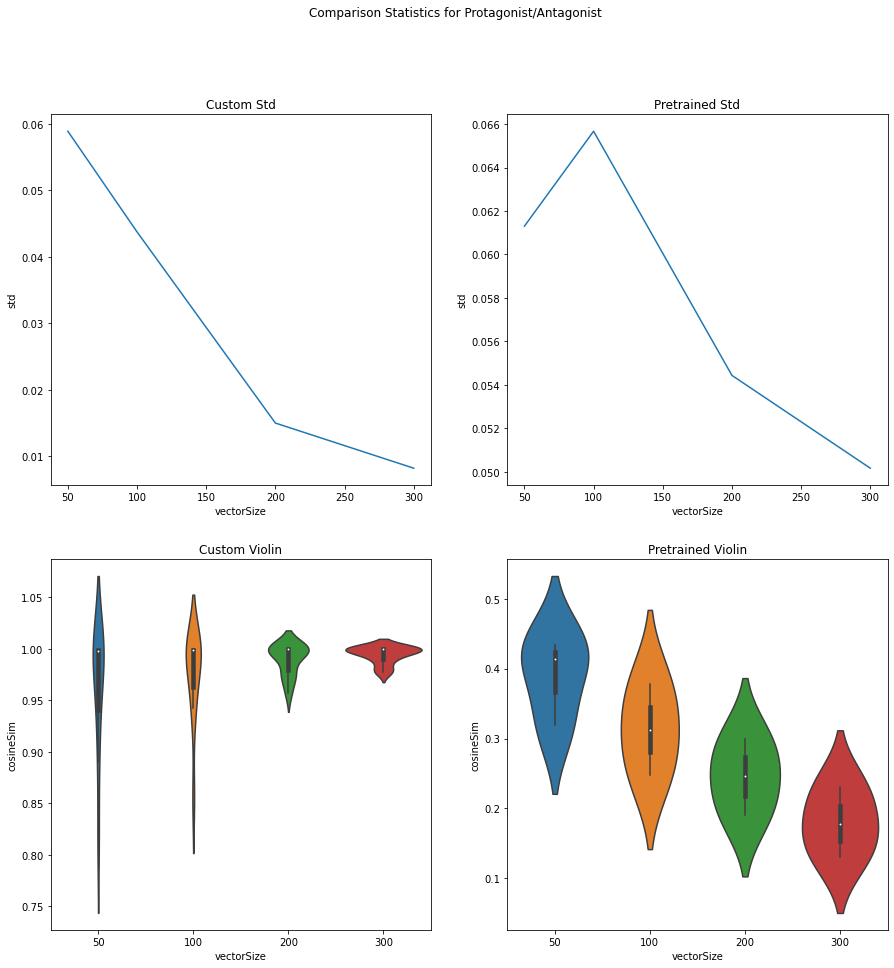

In [ ]:
plot_differences(protag_antag_dists, protag_antag_dists_pre, "Protagonist/Antagonist")

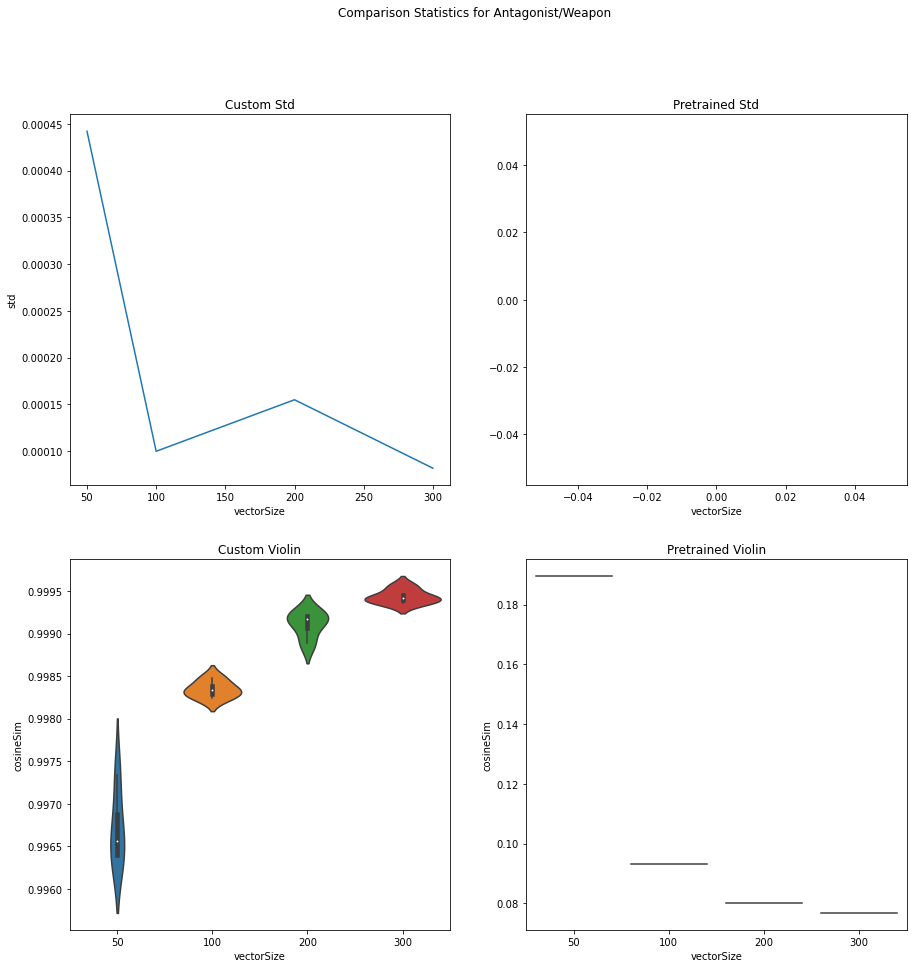

In [ ]:
plot_differences(antag_crime_weap_dists, antag_crime_weap_dists_pre, "Antagonist/Weapon")

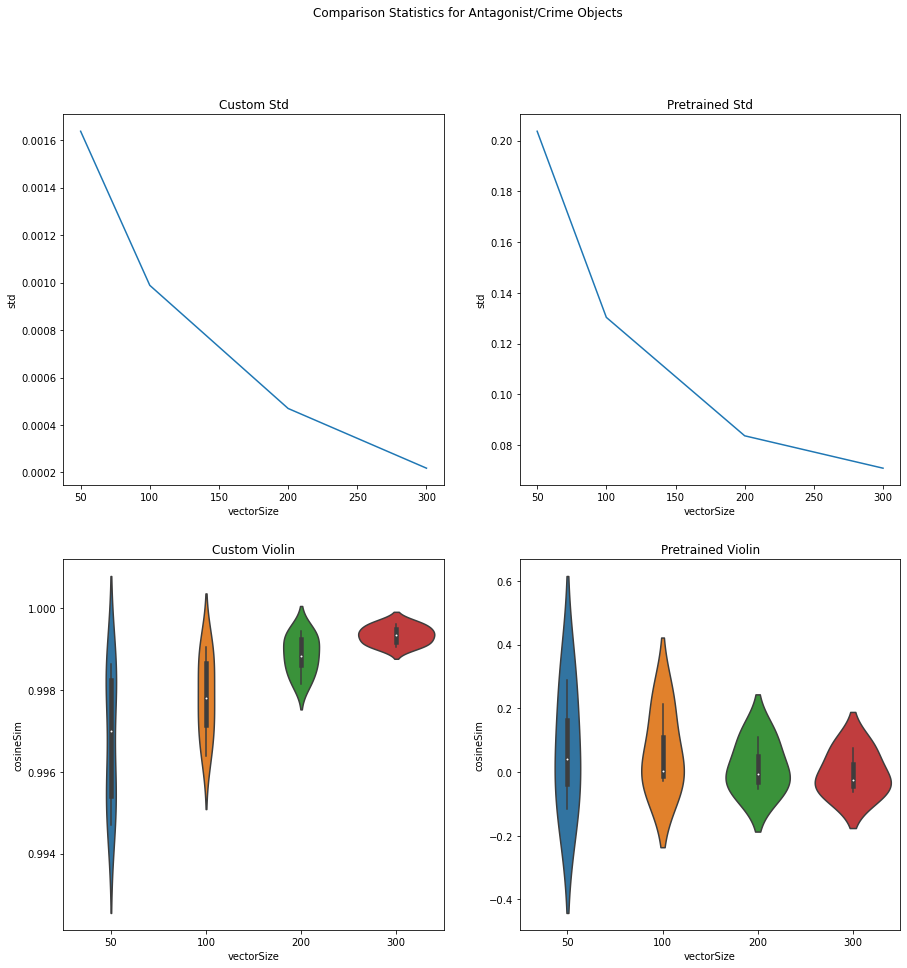

In [ ]:
plot_differences(antag_crime_obj_dists, antag_crime_obj_dists_pre, "Antagonist/Crime Objects")

### Man in the Lower Ten

In [ ]:
# The_Man_in_Lower_Ten - Custom Embeddings
protag_antag_dists = pd.read_pickle(f"data{os.sep}The_Man_in_Lower_Ten__protag_antag_dists.pkl")
antag_crime_weap_dists = pd.read_pickle(f"data{os.sep}The_Man_in_Lower_Ten__antag_crime_weap_dists.pkl")
antag_crime_obj_dists = pd.read_pickle(f"data{os.sep}The_Man_in_Lower_Ten__antag_crime_obj_dists.pkl")

In [ ]:
# The_Man_in_Lower_Ten - Pretrained Embeddings
protag_antag_dists_pre = pd.read_pickle(f"data{os.sep}The_Man_in_Lower_Ten__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre = pd.read_pickle(f"data{os.sep}The_Man_in_Lower_Ten__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre = pd.read_pickle(f"data{os.sep}The_Man_in_Lower_Ten__antag_crime_obj_dists__PRETRAINED.pkl")

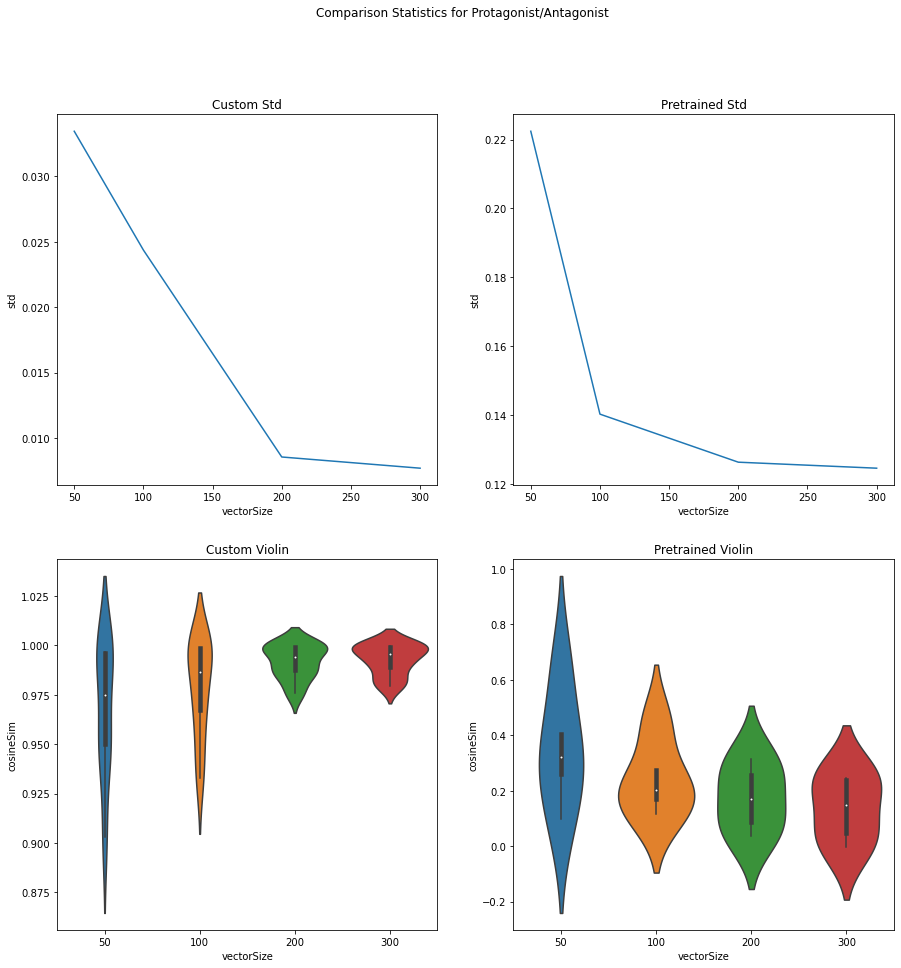

In [ ]:
plot_differences(protag_antag_dists, protag_antag_dists_pre, "Protagonist/Antagonist")

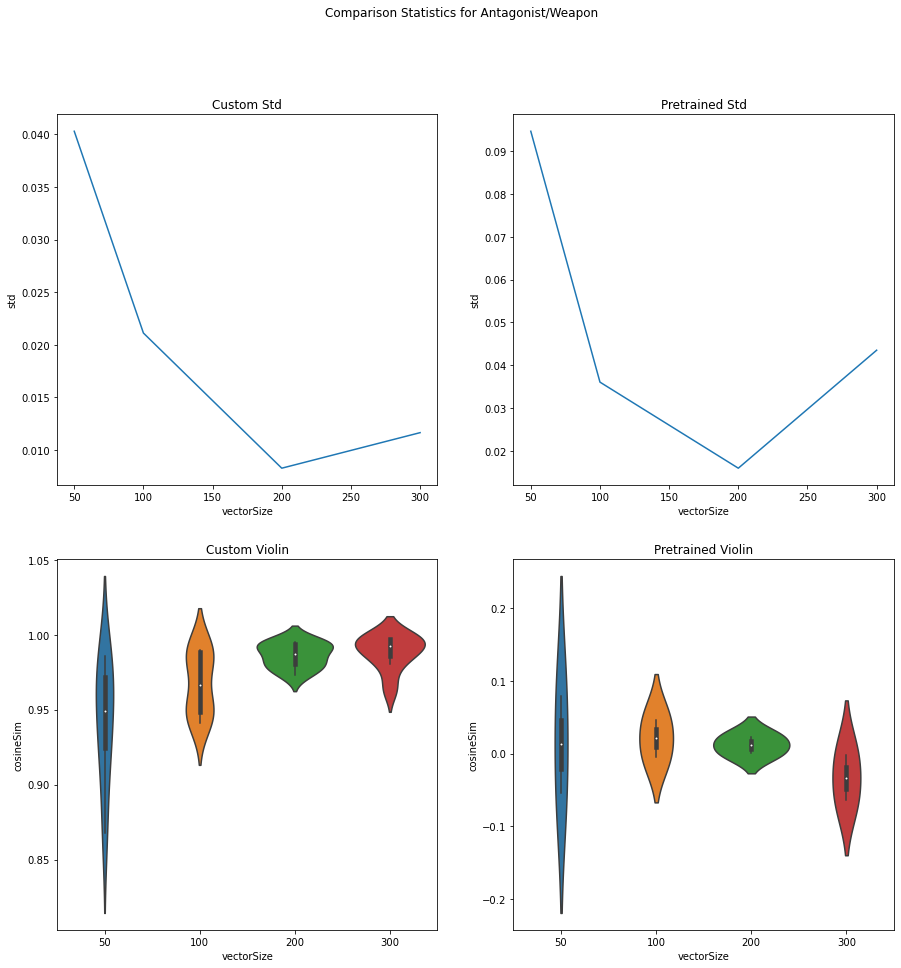

In [ ]:
plot_differences(antag_crime_weap_dists, antag_crime_weap_dists_pre, "Antagonist/Weapon")

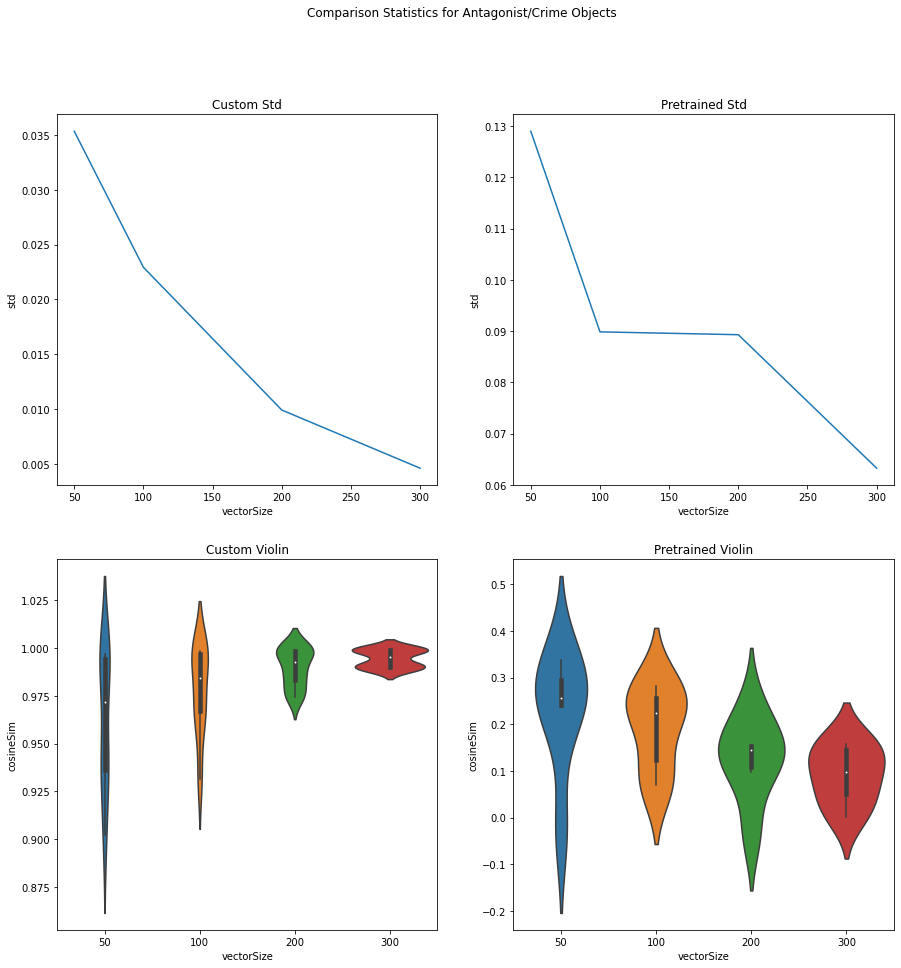

In [ ]:
plot_differences(antag_crime_obj_dists, antag_crime_obj_dists_pre, "Antagonist/Crime Objects")

### The After House

In [ ]:
# The_After_House - Custom Embeddings
protag_antag_dists = pd.read_pickle(f"data{os.sep}The_After_House__protag_antag_dists.pkl")
antag_crime_weap_dists = pd.read_pickle(f"data{os.sep}The_After_House__antag_crime_weap_dists.pkl")
antag_crime_obj_dists = pd.read_pickle(f"data{os.sep}The_After_House__antag_crime_obj_dists.pkl")

In [ ]:
# The_After_House - Pretrained Embeddings
protag_antag_dists = pd.read_pickle(f"data{os.sep}The_Window_at_the_White_Cat__protag_antag_dists.pkl")
antag_crime_weap_dists = pd.read_pickle(f"data{os.sep}The_Window_at_the_White_Cat__antag_crime_weap_dists.pkl")
antag_crime_obj_dists = pd.read_pickle(f"data{os.sep}The_Window_at_the_White_Cat__antag_crime_obj_dists.pkl")

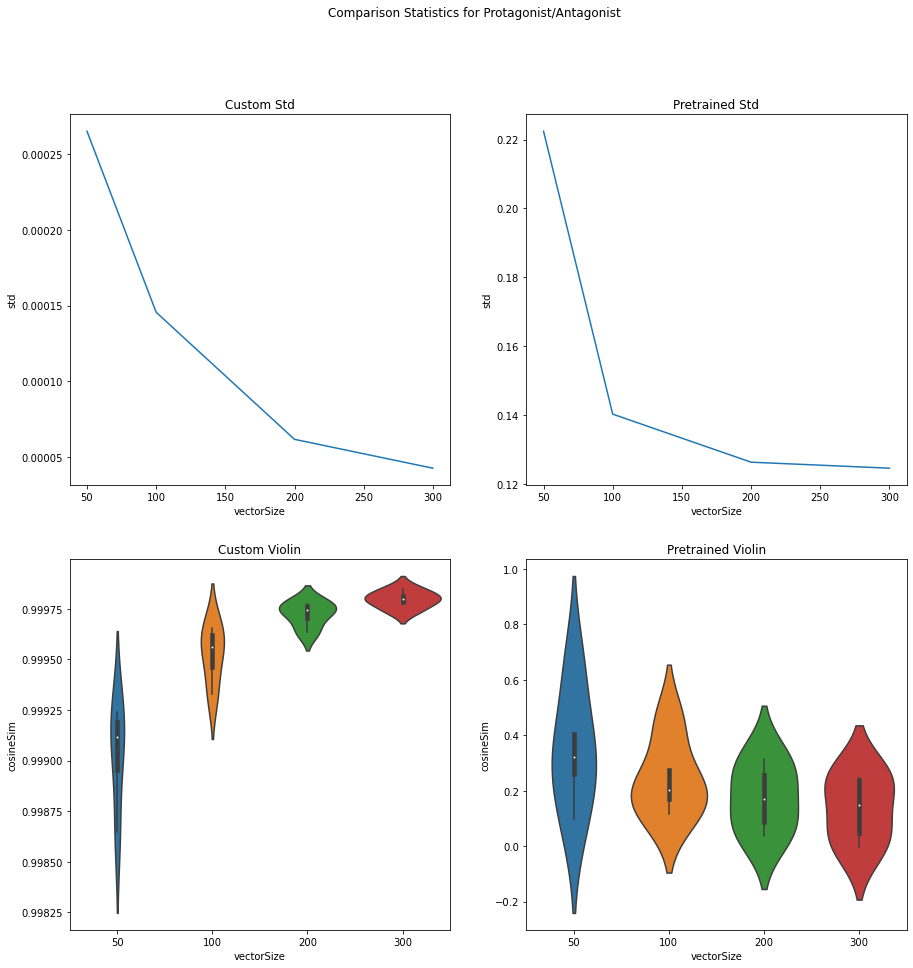

In [ ]:
plot_differences(protag_antag_dists, protag_antag_dists_pre, "Protagonist/Antagonist")

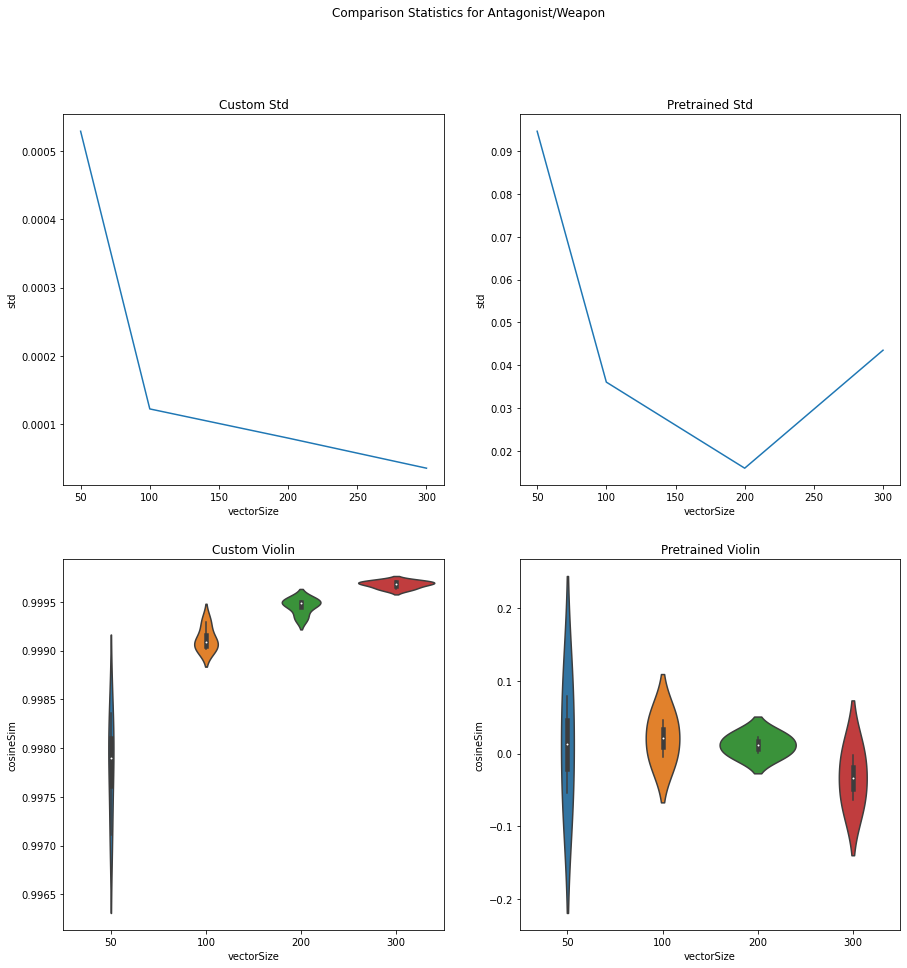

In [ ]:
plot_differences(antag_crime_weap_dists, antag_crime_weap_dists_pre, "Antagonist/Weapon")

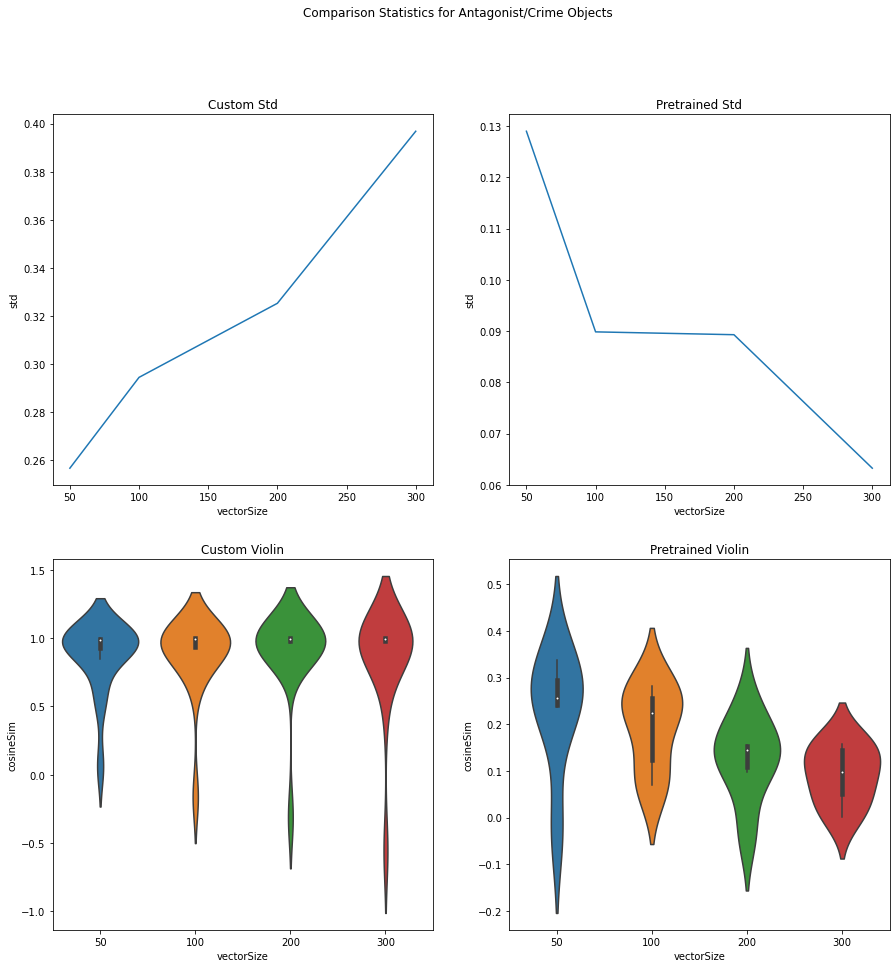

In [ ]:
plot_differences(antag_crime_obj_dists, antag_crime_obj_dists_pre, "Antagonist/Crime Objects")

### The Window at the White Cat

In [ ]:
# The_Window_at_the_White_Cat - Custom Embeddings
protag_antag_dists_pre = pd.read_pickle(f"data{os.sep}The_Window_at_the_White_Cat__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre = pd.read_pickle(f"data{os.sep}The_Window_at_the_White_Cat__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre = pd.read_pickle(f"data{os.sep}The_Window_at_the_White_Cat__antag_crime_obj_dists__PRETRAINED.pkl")

In [ ]:
# The_Window_at_the_White_Cat - Pretrained Embeddings
protag_antag_dists_pre = pd.read_pickle(f"data{os.sep}The_After_House__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre = pd.read_pickle(f"data{os.sep}The_After_House__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre = pd.read_pickle(f"data{os.sep}The_After_House__antag_crime_obj_dists__PRETRAINED.pkl")

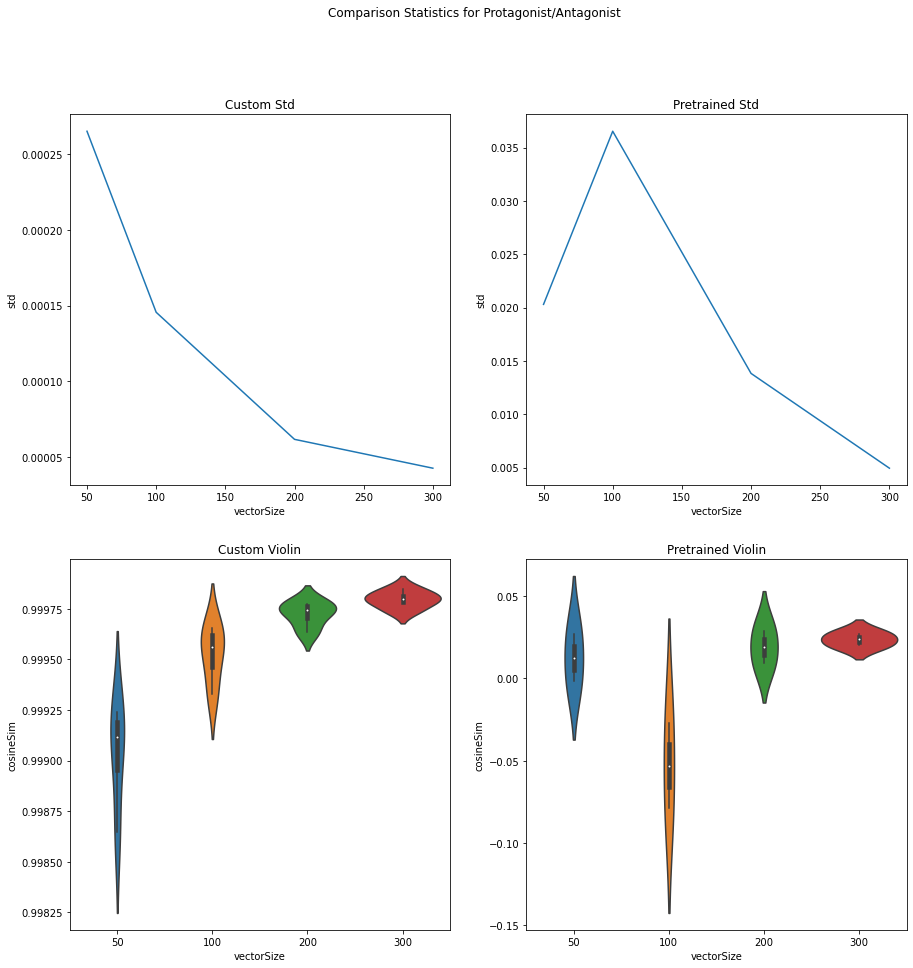

In [ ]:
plot_differences(protag_antag_dists, protag_antag_dists_pre, "Protagonist/Antagonist")

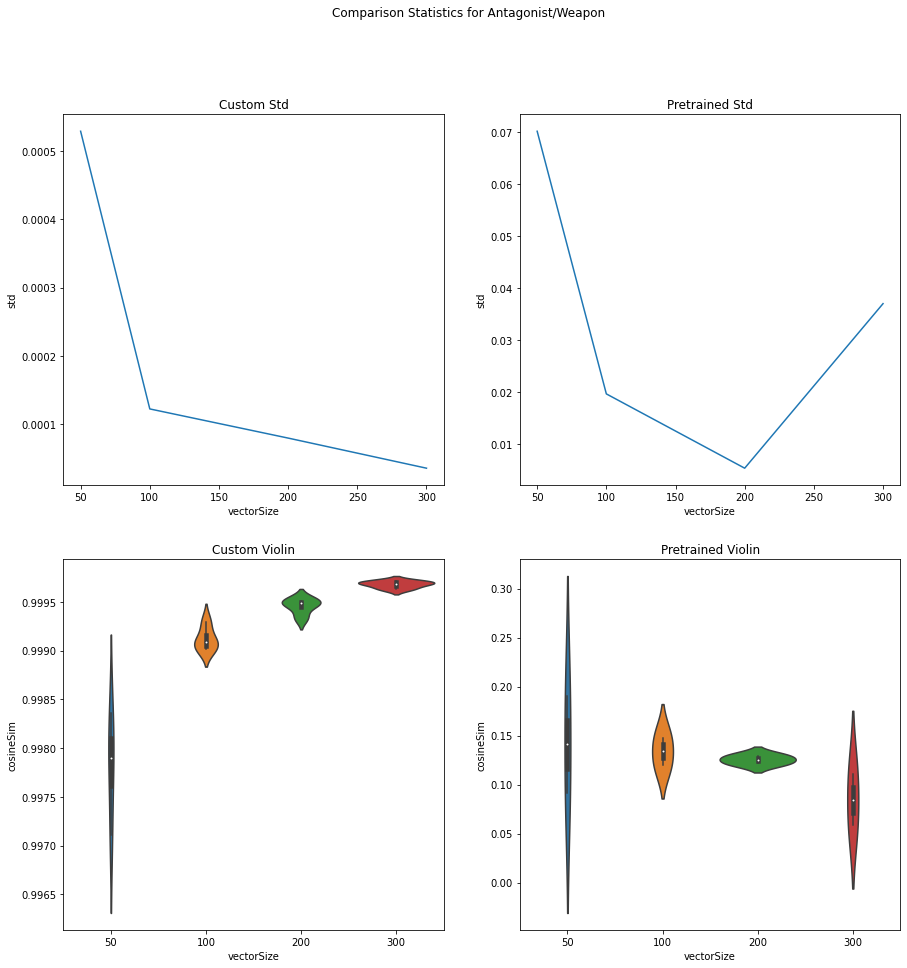

In [ ]:
plot_differences(antag_crime_weap_dists, antag_crime_weap_dists_pre, "Antagonist/Weapon")

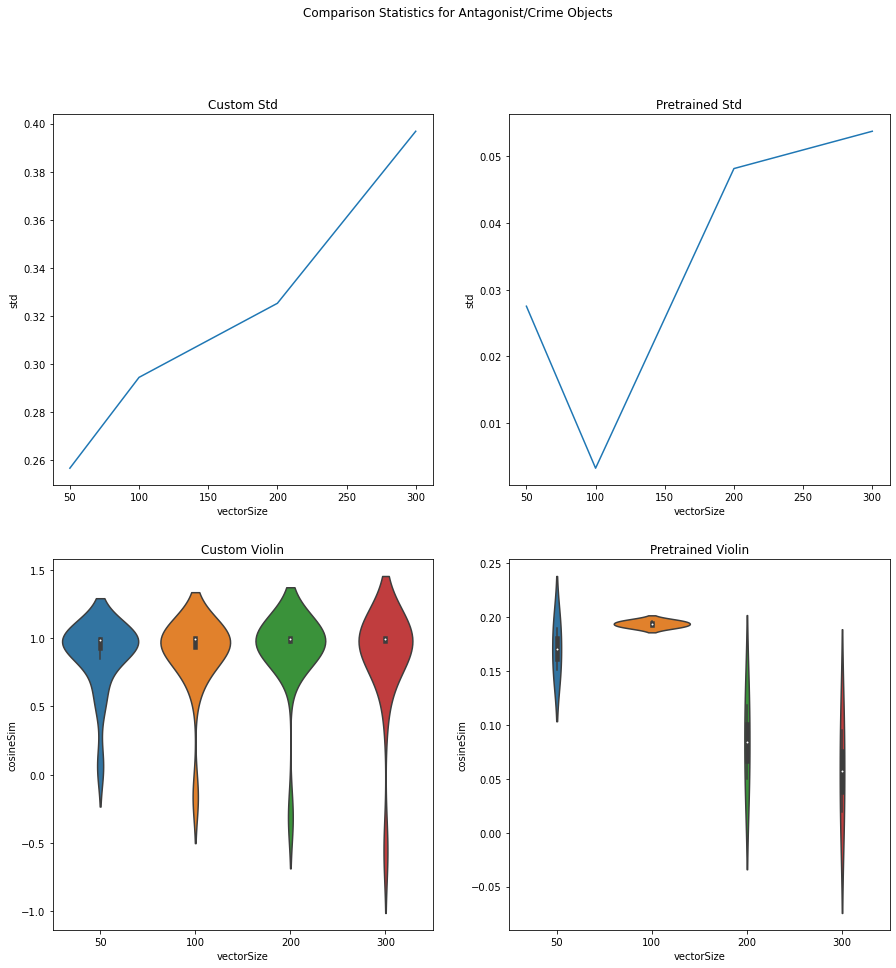

In [ ]:
plot_differences(antag_crime_obj_dists, antag_crime_obj_dists_pre, "Antagonist/Crime Objects")

### The Bat

In [ ]:
# The_Bat - Custom Embeddings
protag_antag_dists = pd.read_pickle(f"data{os.sep}The_Bat__protag_antag_dists.pkl")
antag_crime_weap_dists = pd.read_pickle(f"data{os.sep}The_Bat__antag_crime_weap_dists.pkl")
antag_crime_obj_dists = pd.read_pickle(f"data{os.sep}The_Bat__antag_crime_obj_dists.pkl")

In [ ]:
# The_Bat - Pretrained Embeddings
protag_antag_dists_pre = pd.read_pickle(f"data{os.sep}The_Bat__protag_antag_dists__PRETRAINED.pkl")
antag_crime_weap_dists_pre = pd.read_pickle(f"data{os.sep}The_Bat__antag_crime_weap_dists__PRETRAINED.pkl")
antag_crime_obj_dists_pre = pd.read_pickle(f"data{os.sep}The_Bat__antag_crime_obj_dists__PRETRAINED.pkl")

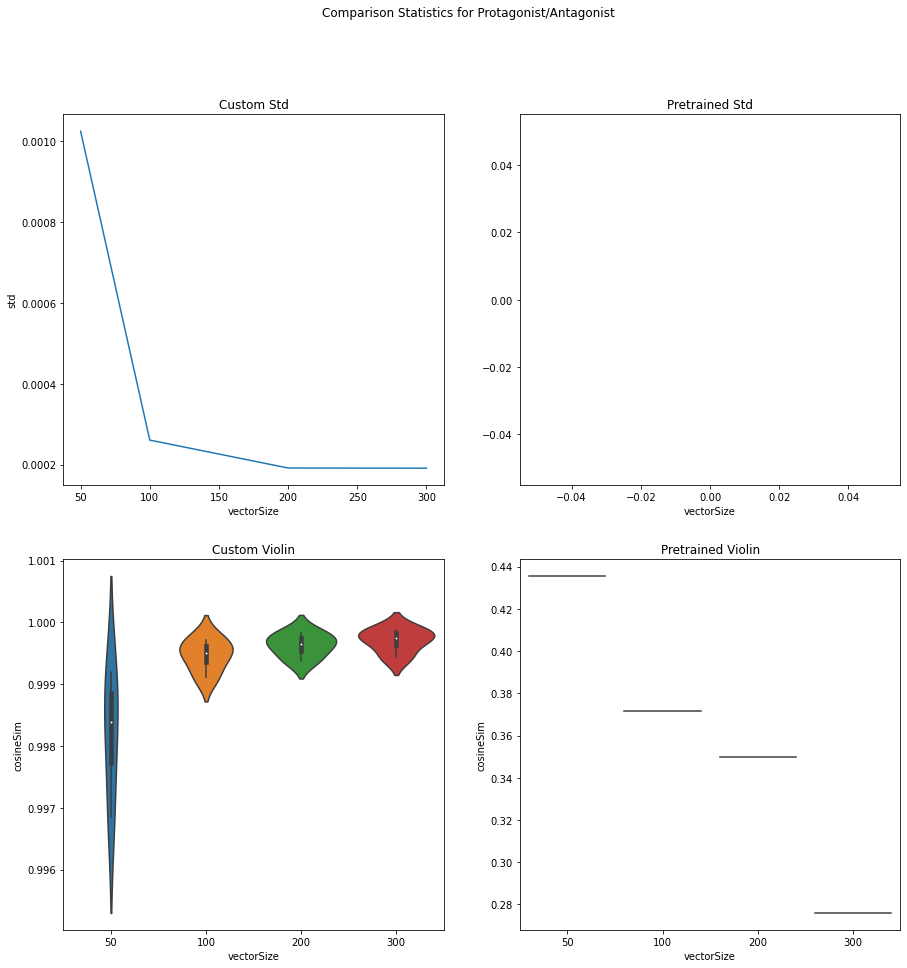

In [ ]:
plot_differences(protag_antag_dists, protag_antag_dists_pre, "Protagonist/Antagonist")

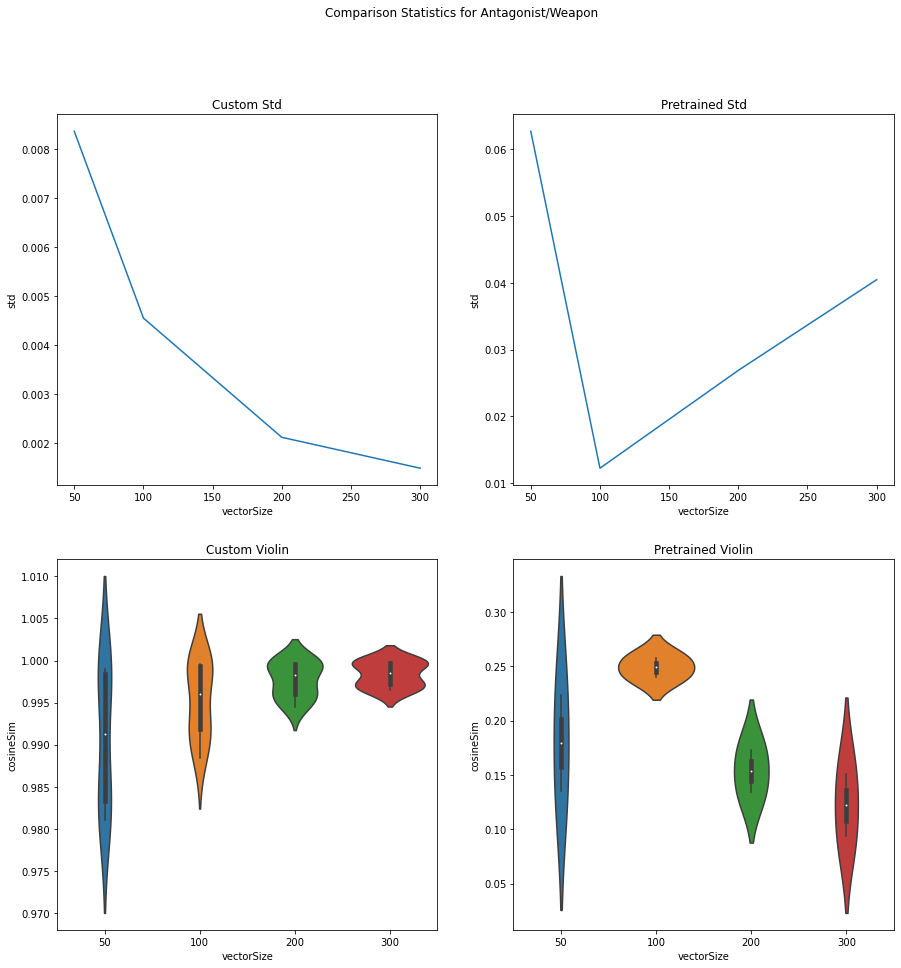

In [ ]:
plot_differences(antag_crime_weap_dists, antag_crime_weap_dists_pre, "Antagonist/Weapon")

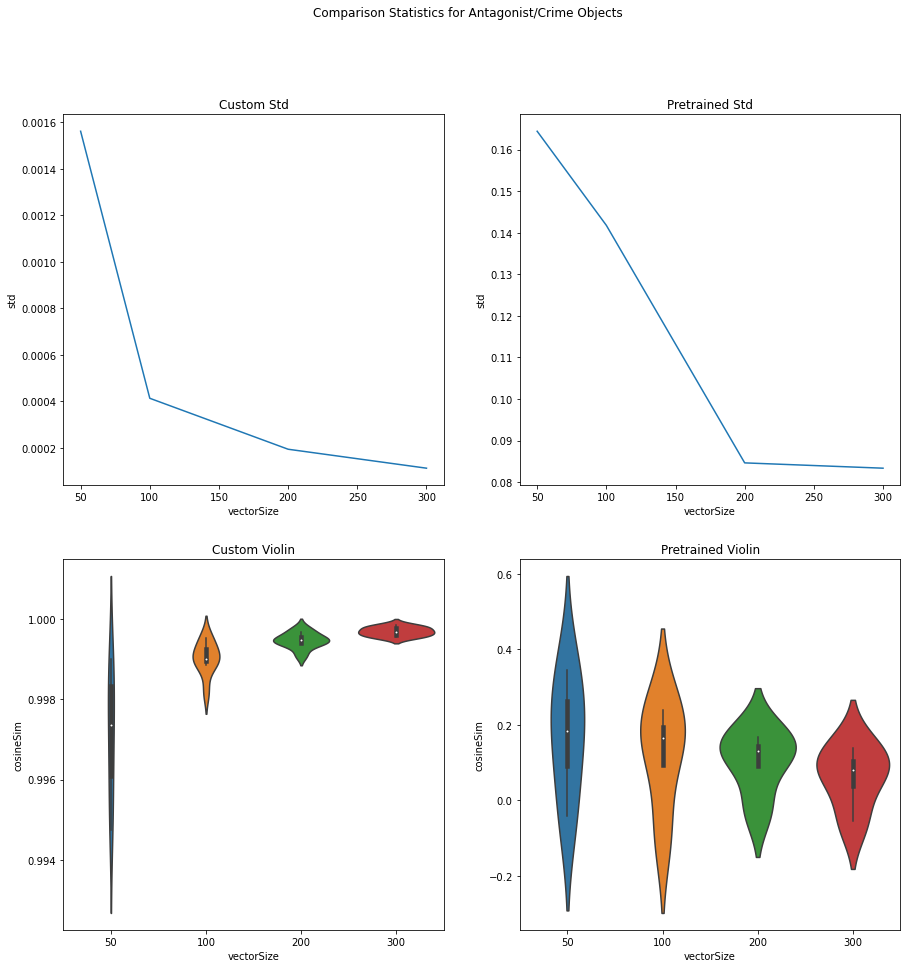

In [ ]:
plot_differences(antag_crime_obj_dists, antag_crime_obj_dists_pre, "Antagonist/Crime Objects")